# Fun with Pandas

We will use data from the [ergast API](https://ergast.com/mrd/) for the following examples.

[Ergast Postman collection with documentation](https://documenter.getpostman.com/view/11586746/SztEa7bL)

## What's a Dataframe again?
A **DataFrame** is composed of one or more **Series**. 
The names of the **Series** form the column names, and the row labels form the **Index**.

You may create a Dataframe in multiple ways, i.e.
* data from a file - df.read_csv(...)
* data from an API - df = pd.Dataframe(json_payload)
* data from a db
* ...



In [1]:
# first, install the requirements
%pip install -r ../requirements.txt >> results/requirements_log.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import the needed libraries
import requests
import pandas as pd
import numpy as np

In [4]:
# analyse a sample

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'])

df.head()


,season,round,url,raceName,Circuit,date,time,FirstPractice,SecondPractice,ThirdPractice,Qualifying,Sprint
0,2022,1,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,Bahrain Grand Prix,"{'circuitId': 'bahrain', 'url': 'http://en.wik...",2022-03-20,15:00:00Z,"{'date': '2022-03-18', 'time': '12:00:00Z'}","{'date': '2022-03-18', 'time': '15:00:00Z'}","{'date': '2022-03-19', 'time': '12:00:00Z'}","{'date': '2022-03-19', 'time': '15:00:00Z'}",NaN
1,2022,2,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,Saudi Arabian Grand Prix,"{'circuitId': 'jeddah', 'url': 'http://en.wiki...",2022-03-27,17:00:00Z,"{'date': '2022-03-25', 'time': '14:00:00Z'}","{'date': '2022-03-25', 'time': '17:00:00Z'}","{'date': '2022-03-26', 'time': '14:00:00Z'}","{'date': '2022-03-26', 'time': '17:00:00Z'}",NaN
2,2022,3,http://en.wikipedia.org/wiki/2022_Australian_G...,Australian Grand Prix,"{'circuitId': 'albert_park', 'url': 'http://en...",2022-04-10,05:00:00Z,"{'date': '2022-04-08', 'time': '03:00:00Z'}","{'date': '2022-04-08', 'time': '06:00:00Z'}","{'date': '2022-04-09', 'time': '03:00:00Z'}","{'date': '2022-04-09', 'time': '06:00:00Z'}",NaN
3,2022,4,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,Emilia Romagna Grand Prix,"{'circuitId': 'imola', 'url': 'http://en.wikip...",2022-04-24,13:00:00Z,"{'date': '2022-04-22', 'time': '11:30:00Z'}","{'date': '2022-04-23', 'time': '10:30:00Z'}",NaN,"{'date': '2022-04-22', 'time': '15:00:00Z'}","{'date': '2022-04-23', 'time': '14:30:00Z'}"
4,2022,5,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,Miami Grand Prix,"{'circuitId': 'miami', 'url': 'http://en.wikip...",2022-05-08,19:30:00Z,"{'date': '2022-05-06', 'time': '18:30:00Z'}","{'date': '2022-05-06', 'time': '21:30:00Z'}","{'date': '2022-05-07', 'time': '17:00:00Z'}","{'date': '2022-05-07', 'time': '20:00:00Z'}",NaN


In [ ]:
# pull the f1 2022 season races information from the ergast API

f1_races_2022 = {
    'season': [],
    'round': [],
    'circuit_id': [],
    'raceName': [],
    'url': [],
    'LAT': [],
    'LONG': [],
    'locality': [],
    'country': [],
    'date': [],
    'time': []
}

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
print(r)
j = r.json()

for item in j['MRData']['RaceTable']['Races']:
    try:
        f1_races_2022['season'].append(int(item['season']))
        f1_races_2022['round'].append(int(item['round']))
        f1_races_2022['circuit_id'].append(item['Circuit']['circuitId'])
        f1_races_2022['raceName'].append(item['raceName'])
        f1_races_2022['url'].append(item['url'])
        f1_races_2022['LAT'].append(float(item['Circuit']['Location']['lat']))
        f1_races_2022['LONG'].append(float(item['Circuit']['Location']['long']))
        f1_races_2022['locality'].append(item['Circuit']['Location']['locality'])
        f1_races_2022['country'].append(item['Circuit']['Location']['country'])
        f1_races_2022['date'].append(item['date'])
        f1_races_2022['time'].append(item.get('time'))
    except Exception as e:
        print(f'Error adding item: {item}')
        print(e)
        raise

f1_races_2022 = pd.DataFrame(f1_races_2022)
f1_races_2022

In [305]:
# in order not to stress the API, use the backup file for the historical data
f1_races = pd.read_csv('./resources/f1_races.csv', index_col=0)

In [6]:
f1_races.head()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN


### Series

In [7]:
f1_races.circuit_id

0        silverstone
1             monaco
2       indianapolis
3         bremgarten
4                spa
            ...     
1074          suzuka
1075        americas
1076       rodriguez
1077      interlagos
1078      yas_marina
Name: circuit_id, Length: 1079, dtype: object

### Columns

In [8]:
f1_races.columns

Index(['season', 'round', 'circuit_id', 'raceName', 'url', 'LAT', 'LONG',
       'locality', 'country', 'date', 'time'],
      dtype='object')

### Index

In [9]:
f1_races.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078],
           dtype='int64', length=1079)

### Inspect the data

In [10]:
f1_races.shape

(1079, 11)

### What are the column data types?

In [11]:
f1_races.dtypes

season          int64
round           int64
circuit_id     object
raceName       object
url            object
LAT           float64
LONG          float64
locality       object
country        object
date           object
time           object
dtype: object

### What does the data look like?

In [14]:
f1_races.head()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN


In [15]:
f1_races.tail()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1074,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.5410,Suzuka,Japan,2022-10-09,05:00:00Z
1075,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,2022-10-23,19:00:00Z
1076,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,2022-10-30,20:00:00Z
1077,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,2022-11-13,18:00:00Z
1078,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,2022-11-20,13:00:00Z


### Information on the Dataframe

In [16]:
f1_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      1079 non-null   int64  
 1   round       1079 non-null   int64  
 2   circuit_id  1079 non-null   object 
 3   raceName    1079 non-null   object 
 4   url         1079 non-null   object 
 5   LAT         1079 non-null   float64
 6   LONG        1079 non-null   float64
 7   locality    1079 non-null   object 
 8   country     1079 non-null   object 
 9   date        1079 non-null   object 
 10  time        348 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 101.2+ KB


In [17]:
f1_races[['season', 'date', 'country']].head()

,season,date,country
0,1950,1950-05-13,UK
1,1950,1950-05-21,Monaco
2,1950,1950-05-30,USA
3,1950,1950-06-04,Switzerland
4,1950,1950-06-18,Belgium


In [18]:
f1_races[1068:1076]

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1068,2022,12,ricard,French Grand Prix,http://en.wikipedia.org/wiki/2022_French_Grand...,43.2506,5.79167,Le Castellet,France,2022-07-24,13:00:00Z
1069,2022,13,hungaroring,Hungarian Grand Prix,http://en.wikipedia.org/wiki/2022_Hungarian_Gr...,47.5789,19.24860,Budapest,Hungary,2022-07-31,13:00:00Z
1070,2022,14,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/2022_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,2022-08-28,13:00:00Z
1071,2022,15,zandvoort,Dutch Grand Prix,http://en.wikipedia.org/wiki/2022_Dutch_Grand_...,52.3888,4.54092,Zandvoort,Netherlands,2022-09-04,13:00:00Z
1072,2022,16,monza,Italian Grand Prix,http://en.wikipedia.org/wiki/2022_Italian_Gran...,45.6156,9.28111,Monza,Italy,2022-09-11,13:00:00Z
1073,2022,17,marina_bay,Singapore Grand Prix,http://en.wikipedia.org/wiki/2022_Singapore_Gr...,1.2914,103.86400,Marina Bay,Singapore,2022-10-02,12:00:00Z
1074,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.54100,Suzuka,Japan,2022-10-09,05:00:00Z
1075,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.64110,Austin,USA,2022-10-23,19:00:00Z


### Indexing
Use `iloc[]` to select rows and columns by their positions:

In [19]:
f1_races.iloc[1068:1076, [0, 2, 5, 6]]

,season,circuit_id,LAT,LONG
1068,2022,ricard,43.2506,5.79167
1069,2022,hungaroring,47.5789,19.24860
1070,2022,spa,50.4372,5.97139
1071,2022,zandvoort,52.3888,4.54092
1072,2022,monza,45.6156,9.28111
1073,2022,marina_bay,1.2914,103.86400
1074,2022,suzuka,34.8431,136.54100
1075,2022,americas,30.1328,-97.64110


Use `loc[]` to select by name:

In [20]:
f1_races.loc[1068:1076, 'season':'circuit_id']


,season,round,circuit_id
1068,2022,12,ricard
1069,2022,13,hungaroring
1070,2022,14,spa
1071,2022,15,zandvoort
1072,2022,16,monza
1073,2022,17,marina_bay
1074,2022,18,suzuka
1075,2022,19,americas
1076,2022,20,rodriguez


### Filtering
A **Boolean mask** is a array-like structure of Boolean values – it's a way to specify which rows/columns we want to select (True) and which we don't (False).

In [21]:
f1_races[f1_races['season'] == 2022]

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1057,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1058,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
1059,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
1060,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
1061,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
1062,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
1063,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
1064,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
1065,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
1066,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


In [22]:
f1_races[(f1_races['season'] == 2022) & (f1_races['date'] < '2022-09-01')]

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1057,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1058,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
1059,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
1060,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
1061,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
1062,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
1063,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
1064,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
1065,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
1066,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


We can also use query instead:

In [23]:
f1_races.query("`season` == 2022 and `date` < '2022-09-01'")

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1057,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1058,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
1059,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
1060,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
1061,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
1062,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
1063,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
1064,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
1065,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
1066,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


### Statistics

In [24]:
# how many races were held in each country throughout the years?
f1_races.country.value_counts()

Italy           104
Germany          79
UK               77
USA              73
Monaco           68
Belgium          67
France           63
Spain            59
Canada           51
Brazil           49
Japan            38
Austria          37
Hungary          37
Australia        36
Netherlands      32
South Africa     23
Mexico           22
Argentina        20
Bahrain          19
Malaysia         19
Portugal         18
China            16
UAE              14
Singapore        13
Turkey            9
Russia            8
Sweden            6
Azerbaijan        6
Switzerland       5
Korea             4
India             3
Saudi Arabia      2
Morocco           1
Qatar             1
Name: country, dtype: int64

In [25]:
# how many circuits in each season?
f1_races.season.value_counts()

2022    22
2021    22
2019    21
2018    21
2016    21
        ..
1956     8
1957     8
1961     8
1955     7
1950     7
Name: season, Length: 73, dtype: int64

In [79]:
# how many circuits between 1955 and 1975?
f1_races[(f1_races['season']>=1955) & (f1_races['season']<=1975)].season.value_counts() 

1974    15
1973    15
1975    14
1970    13
1972    12
1968    12
1967    11
1958    11
1971    11
1969    11
1965    10
1964    10
1963    10
1960    10
1966     9
1962     9
1959     9
1956     8
1961     8
1957     8
1955     7
Name: season, dtype: int64

### Continue with the race results

In [42]:
# analyse a sample
url = 'https://ergast.com/api/f1/2022/12/results.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'][0]['Results'])

df.head()

,number,position,positionText,points,Driver,Constructor,grid,laps,status,Time,FastestLap
0,1,1,1,25,"{'driverId': 'max_verstappen', 'permanentNumbe...","{'constructorId': 'red_bull', 'url': 'http://e...",2,53,Finished,"{'millis': '5402112', 'time': '1:30:02.112'}","{'rank': '2', 'lap': '30', 'Time': {'time': '1..."
1,44,2,2,18,"{'driverId': 'hamilton', 'permanentNumber': '4...","{'constructorId': 'mercedes', 'url': 'http://e...",4,53,Finished,"{'millis': '5412699', 'time': '+10.587'}","{'rank': '4', 'lap': '30', 'Time': {'time': '1..."
2,63,3,3,15,"{'driverId': 'russell', 'permanentNumber': '63...","{'constructorId': 'mercedes', 'url': 'http://e...",6,53,Finished,"{'millis': '5418607', 'time': '+16.495'}","{'rank': '3', 'lap': '51', 'Time': {'time': '1..."
3,11,4,4,12,"{'driverId': 'perez', 'permanentNumber': '11',...","{'constructorId': 'red_bull', 'url': 'http://e...",3,53,Finished,"{'millis': '5419422', 'time': '+17.310'}","{'rank': '5', 'lap': '45', 'Time': {'time': '1..."
4,55,5,5,11,"{'driverId': 'sainz', 'permanentNumber': '55',...","{'constructorId': 'ferrari', 'url': 'http://en...",19,53,Finished,"{'millis': '5430984', 'time': '+28.872'}","{'rank': '1', 'lap': '51', 'Time': {'time': '1..."


In [43]:
# get the latest race's results

f1_results_latest = {
    'season': [],
    'Round': [],
    'date': [],
    'circuit_id': [],
    'driver': [],
    'DATE_of_birth': [],
    'nationality': [],
    'constructor': [],
    'GriD': [],
    'tIME': [],
    'Status': [],
    'points': [],
    'podium': []
}

url_latest = 'https://ergast.com/api/f1/current/last/results.json'
r = requests.get(url_latest)
print(r)
j = r.json()

try:
    for item in j['MRData']['RaceTable']['Races'][0]['Results']:
        try:
            f1_results_latest['season'].append(int(j['MRData']['RaceTable']['Races'][0]['season']))
            f1_results_latest['Round'].append(int(j['MRData']['RaceTable']['Races'][0]['round']))
            f1_results_latest['date'].append(j['MRData']['RaceTable']['Races'][0]['date'])
            f1_results_latest['circuit_id'].append(j['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            f1_results_latest['driver'].append(item['Driver']['driverId'])
            f1_results_latest['DATE_of_birth'].append(item['Driver']['dateOfBirth'])
            f1_results_latest['nationality'].append(item['Driver']['nationality'])
            f1_results_latest['constructor'].append(item['Constructor']['constructorId'])
            f1_results_latest['GriD'].append(int(item['grid']))
            f1_results_latest['tIME'].append(int((item.get('Time') or {}).get('millis')) 
        if bool((item.get('Time') or {}).get('millis')) else None)
            f1_results_latest['Status'].append(item['status'])
            f1_results_latest['points'].append(item['points'])
            f1_results_latest['podium'].append(int(item['position']))
        except Exception as e:
            print(f'Error adding item: {item}')
            print(e)
            raise
except IndexError:
    print(f'Race has not happened yet... ')


f1_results_latest = pd.DataFrame(f1_results_latest)

f1_results_latest.head()

<Response [200]>


,season,Round,date,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
0,2022,13,2022-07-31,hungaroring,max_verstappen,1997-09-30,Dutch,red_bull,10,5975912.0,Finished,25,1
1,2022,13,2022-07-31,hungaroring,hamilton,1985-01-07,British,mercedes,7,5983746.0,Finished,19,2
2,2022,13,2022-07-31,hungaroring,russell,1998-02-15,British,mercedes,1,5988249.0,Finished,15,3
3,2022,13,2022-07-31,hungaroring,sainz,1994-09-01,Spanish,ferrari,2,5990491.0,Finished,12,4
4,2022,13,2022-07-31,hungaroring,perez,1990-01-26,Mexican,red_bull,11,5991600.0,Finished,10,5


In [4]:
# in order not to stress the API, use the backup file for the historical data

f1_results = pd.read_csv('./resources/f1_results.csv', index_col=0)

# the code that generated the backup files is available in the resouces section


In [45]:
f1_results.head()

,season,Round,date,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
0,1950,1,1950-05-13,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1
1,1950,1,1950-05-13,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2
2,1950,1,1950-05-13,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3
3,1950,1,1950-05-13,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4
4,1950,1,1950-05-13,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5


In [47]:
# find the dimensions (number of rows, number of columns) in the data
f1_results.shape

(25207, 13)

In [127]:
# calculate summary statistics for nationality and points (median)
f1_results[['nationality', 'points']].groupby('nationality').describe()
# f1_results[['nationality', 'points']].groupby('nationality').mean()

points                                               
                    count      mean       std  min  25%  50%   75%   max
nationality                                                             
American           1204.0  0.828073  1.953834  0.0  0.0  0.0   0.0   9.0
American-Italian      1.0  0.000000       NaN  0.0  0.0  0.0   0.0   0.0
Argentine           363.0  1.925399  2.929092  0.0  0.0  0.0   4.0   9.0
Argentine-Italian     2.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Australian          809.0  3.474042  5.709712  0.0  0.0  0.0   6.0  26.0
Austrian            687.0  1.441776  2.601909  0.0  0.0  0.0   2.0  10.0
Belgian             563.0  0.689165  1.750752  0.0  0.0  0.0   0.0   9.0
Brazilian          1932.0  1.771739  3.263488  0.0  0.0  0.0   2.0  36.0
British            4359.0  2.368809  5.054430  0.0  0.0  0.0   2.0  50.0
Canadian            434.0  1.218894  2.744806  0.0  0.0  0.0   1.0  15.0
Chilean              37.0  0.081081  0.363500  0.0  0.0  0.0   0.0   2.0
Chinese              13.0  0.384615  1.120897  0.0  0.0  0.0   0.0   4.0
Colombian           125.0  2.456000  3.199052  0.0  0.0  0.0   5.0  10.0
Czech                 3.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Danish              168.0  1.059524  2.586706  0.0  0.0  0.0   0.0  18.0
Dutch               468.0  3.887821  7.523462  0.0  0.0  0.0   2.0  26.0
East German           5.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Finnish            1131.0  3.868700  5.762616  0.0  0.0  0.0   6.0  30.0
French             2947.0  1.161293  2.589140  0.0  0.0  0.0   1.0  25.0
German             2325.0  3.408817  5.851474  0.0  0.0  0.0   4.0  25.0
Hungarian            20.0  0.050000  0.223607  0.0  0.0  0.0   0.0   1.0
Indian               59.0  0.084746  0.650945  0.0  0.0  0.0   0.0   5.0
Indonesian           12.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Irish                92.0  0.173913  0.585703  0.0  0.0  0.0   0.0   3.0
Italian            3292.0  0.620188  1.640866  0.0  0.0  0.0   0.0  10.0
Japanese            607.0  0.415157  1.536885  0.0  0.0  0.0   0.0  15.0
Liechtensteiner      13.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Malaysian            16.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Mexican             411.0  2.805353  4.812694  0.0  0.0  0.0   4.0  25.0
Monegasque          123.0  5.918699  7.170744  0.0  0.0  2.0  12.0  26.0
New Zealander       392.0  1.381378  2.233913  0.0  0.0  0.0   2.0   9.0
Polish               99.0  2.767677  3.971398  0.0  0.0  0.0   5.0  18.0
Portuguese           74.0  0.108108  0.713232  0.0  0.0  0.0   0.0   6.0
Rhodesian            18.0  0.333333  1.414214  0.0  0.0  0.0   0.0   6.0
Russian             213.0  1.253521  3.149056  0.0  0.0  0.0   1.0  18.0
South African       209.0  1.349282  2.499521  0.0  0.0  0.0   2.0   9.0
Spanish             800.0  3.479375  5.448175  0.0  0.0  0.0   6.0  25.0
Swedish             501.0  0.790419  1.860642  0.0  0.0  0.0   0.0   9.0
Swiss               484.0  0.719008  1.718120  0.0  0.0  0.0   0.0   9.0
Thai                 70.0  2.971429  4.449300  0.0  0.0  0.0   5.5  15.0
Uruguayan             6.0  0.000000  0.000000  0.0  0.0  0.0   0.0   0.0
Venezuelan          120.0  0.641667  2.687649  0.0  0.0  0.0   0.0  25.0

In [128]:
# isolate the date, race name, driver and constructor for the 1999 season
f1_results[['date','circuit_id','driver','constructor']][f1_results['season']==1999]

,date,circuit_id,driver,constructor
15875,1999-03-07,albert_park,irvine,ferrari
15876,1999-03-07,albert_park,frentzen,jordan
15877,1999-03-07,albert_park,ralf_schumacher,williams
15878,1999-03-07,albert_park,fisichella,benetton
15879,1999-03-07,albert_park,barrichello,stewart
...,...,...,...,...
16222,1999-10-31,suzuka,gene,minardi
16223,1999-10-31,suzuka,damon_hill,jordan
16224,1999-10-31,suzuka,panis,prost
16225,1999-10-31,suzuka,trulli,prost


In [129]:
# how many wins for McLaren between 1975 and 1985?
f1_results[(f1_results['constructor'] == 'mclaren') 
    & (f1_results['season'] >= 1975)
    & (f1_results['season'] <= 1985) 
    & (f1_results['podium'] == 1)].constructor.count()


36

## Data cleaning

We'll be looking at creating, renaming, and dropping columns, type conversion and sorting - which will make working with this data easier

### Dropping columns
Our dataset may contain information that is not of interest for our analysis.

In [130]:
f1_races.head()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN


In [131]:
# from the f1_races df, let's remove the url column
mask = f1_races.columns.str.contains('url$', regex=True)
columns_to_drop = f1_races.columns[mask]
columns_to_drop

Index(['url'], dtype='object')

In [132]:
f1_races = f1_races.drop(columns=columns_to_drop)
f1_races.head()

,season,round,circuit_id,raceName,LAT,LONG,locality,country,date,time
0,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN


In [133]:
# another way to do this is to select what we want to keep
mask = f1_races.columns.str.contains('url$|round', regex=True)
f1_races.loc[:,~mask]

,season,circuit_id,raceName,LAT,LONG,locality,country,date,time
0,1950,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN
...,...,...,...,...,...,...,...,...,...
1074,2022,suzuka,Japanese Grand Prix,34.8431,136.54100,Suzuka,Japan,2022-10-09,05:00:00Z
1075,2022,americas,United States Grand Prix,30.1328,-97.64110,Austin,USA,2022-10-23,19:00:00Z
1076,2022,rodriguez,Mexico City Grand Prix,19.4042,-99.09070,Mexico City,Mexico,2022-10-30,20:00:00Z
1077,2022,interlagos,Brazilian Grand Prix,-23.7036,-46.69970,São Paulo,Brazil,2022-11-13,18:00:00Z


In [ ]:
# or simply
f1_races.drop('time', axis=1, inplace=True)


In [136]:
f1_races.head()

,season,round,circuit_id,raceName,LAT,LONG,locality,country,date
0,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,1950-05-13
1,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21
2,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,1950-05-30
3,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,1950-06-04
4,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,1950-06-18


### Renaming columns
Some of the columns have weird names. Let's fix that.

In [137]:
f1_races.rename(
    columns={
        'raceName': 'race_name'
    },
    inplace=True # careful with this!
)
f1_races.columns

Index(['season', 'round', 'circuit_id', 'race_name', 'LAT', 'LONG', 'locality',
       'country', 'date'],
      dtype='object')

### Type conversion
Is there something weird about these columns?

In [138]:
f1_races.dtypes

season          int64
round           int64
circuit_id     object
race_name      object
LAT           float64
LONG          float64
locality       object
country        object
date           object
dtype: object

In [139]:
# date should be stored as datetime!
f1_races.loc[:, ['date']] = f1_races.loc[:, ['date']].apply(pd.to_datetime)
f1_races.dtypes

season                 int64
round                  int64
circuit_id            object
race_name             object
LAT                  float64
LONG                 float64
locality              object
country               object
date          datetime64[ns]
dtype: object

In [140]:
# or
f1_races.loc[:, ['date']].astype({'date': 'datetime64[ns]'}).dtypes

date    datetime64[ns]
dtype: object

### Creating new columns
Let's create a 'race_month' column.

In [141]:
f1_races = f1_races.assign(
    race_month=lambda x: x.date.dt.month_name()
)

You can read more about Python lambda functions [here](https://realpython.com/python-lambda/).

In [142]:
f1_races.head()

,season,round,circuit_id,race_name,LAT,LONG,locality,country,date,race_month
0,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,1950-05-13,May
1,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,May
2,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,1950-05-30,May
3,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,1950-06-04,June
4,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,1950-06-18,June


### Sorting

In [143]:
f1_races.sort_values(['race_name', 'date'], ascending=[False, True]).head()


,season,round,circuit_id,race_name,LAT,LONG,locality,country,date,race_month
266,1976,3,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA,1976-03-28,March
283,1977,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA,1977-04-03,April
300,1978,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA,1978-04-02,April
316,1979,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA,1979-04-08,April
331,1980,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA,1980-03-30,March


In [144]:
f1_races.nlargest(3, 'date')

,season,round,circuit_id,race_name,LAT,LONG,locality,country,date,race_month
1078,2022,22,yas_marina,Abu Dhabi Grand Prix,24.4672,54.6031,Abu Dhabi,UAE,2022-11-20,November
1077,2022,21,interlagos,Brazilian Grand Prix,-23.7036,-46.6997,São Paulo,Brazil,2022-11-13,November
1076,2022,20,rodriguez,Mexico City Grand Prix,19.4042,-99.0907,Mexico City,Mexico,2022-10-30,October


In [145]:
f1_races.nsmallest(3, 'date')


,season,round,circuit_id,race_name,LAT,LONG,locality,country,date,race_month
0,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,1950-05-13,May
1,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,May
2,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,1950-05-30,May


## Working with the index
We haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index
Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling set_index():

In [146]:
f1_races.set_index('date', inplace=True)
f1_races.head(3)

,season,round,circuit_id,race_name,LAT,LONG,locality,country,race_month
date,,,,,,,,,
1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,May
1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,May
1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,May


In [147]:
f1_races.sort_index(inplace=True, ascending=False)
f1_races.head()

,season,round,circuit_id,race_name,LAT,LONG,locality,country,race_month
date,,,,,,,,,
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,24.4672,54.6031,Abu Dhabi,UAE,November
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,-23.7036,-46.6997,São Paulo,Brazil,November
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,19.4042,-99.0907,Mexico City,Mexico,October
2022-10-23,2022,19,americas,United States Grand Prix,30.1328,-97.6411,Austin,USA,October
2022-10-09,2022,18,suzuka,Japanese Grand Prix,34.8431,136.5410,Suzuka,Japan,October


`f1_races.sort_index(axis=1)` will sort the columns by name. 

The axis parameter is present throughout the pandas library: axis=0 targets rows and axis=1 targets columns.

In [148]:
f1_races['2022-10-23':'2022-11-20']


,season,round,circuit_id,race_name,LAT,LONG,locality,country,race_month
date,,,,,,,,,
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,24.4672,54.6031,Abu Dhabi,UAE,November
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,-23.7036,-46.6997,São Paulo,Brazil,November
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,19.4042,-99.0907,Mexico City,Mexico,October
2022-10-23,2022,19,americas,United States Grand Prix,30.1328,-97.6411,Austin,USA,October


In [149]:
# when not specifying a range
f1_races.loc['2022-10-30']

season                          2022
round                             20
circuit_id                 rodriguez
race_name     Mexico City Grand Prix
LAT                          19.4042
LONG                        -99.0907
locality                 Mexico City
country                       Mexico
race_month                   October
Name: 2022-10-30 00:00:00, dtype: object

In [151]:
f1_races.sort_index(inplace=True, ascending=True)
f1_races.head()

,season,round,circuit_id,race_name,LAT,LONG,locality,country,race_month
date,,,,,,,,,
1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,May
1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,May
1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,May
1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,June
1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,June


### Resetting the index


In [152]:
f1_races.reset_index(inplace=True)
f1_races.head()

,date,season,round,circuit_id,race_name,LAT,LONG,locality,country,race_month
0,1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,May
1,1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,May
2,1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,May
3,1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,June
4,1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,June


### Reshaping the data


In [153]:
# lowercase all column names so the dataset is easier to work with
f1_races = f1_races.rename(columns=lambda x: x.lower())
f1_races.head()

,date,season,round,circuit_id,race_name,lat,long,locality,country,race_month
0,1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,May
1,1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,May
2,1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,May
3,1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,June
4,1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,June


## Data visualisation

## Plotting with pandas

To embed SVG-format plots in the notebook, we will also call the %config and %matplotlib `inline` magics:

In [154]:
%config InlineBackend.figure_formats = ['svg']

You can read more about magics [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

<AxesSubplot:title={'center':'not very helpful'}, ylabel='year'>

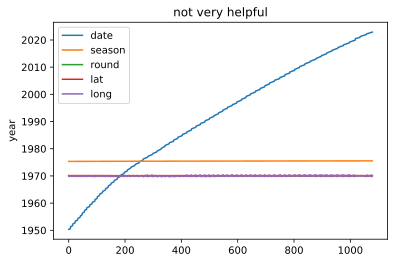

In [155]:
# the plot() method will generate line plots for all numeric columns by default
f1_races.plot(title='not very helpful', ylabel='year', alpha=1)

The `plot()` method returns an Axes object that can be modified further (e.g., to add reference lines, annotations, labels, etc.). Let's walk through an example.

In [156]:
f1_races.head()

,date,season,round,circuit_id,race_name,lat,long,locality,country,race_month
0,1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,May
1,1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,May
2,1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,May
3,1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,June
4,1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,June


In [157]:
f1_races.tail(104)

,date,season,round,circuit_id,race_name,lat,long,locality,country,race_month
975,2017-11-26,2017,20,yas_marina,Abu Dhabi Grand Prix,24.4672,54.6031,Abu Dhabi,UAE,November
976,2018-03-25,2018,1,albert_park,Australian Grand Prix,-37.8497,144.9680,Melbourne,Australia,March
977,2018-04-08,2018,2,bahrain,Bahrain Grand Prix,26.0325,50.5106,Sakhir,Bahrain,April
978,2018-04-15,2018,3,shanghai,Chinese Grand Prix,31.3389,121.2200,Shanghai,China,April
979,2018-04-29,2018,4,baku,Azerbaijan Grand Prix,40.3725,49.8533,Baku,Azerbaijan,April
...,...,...,...,...,...,...,...,...,...,...
1074,2022-10-09,2022,18,suzuka,Japanese Grand Prix,34.8431,136.5410,Suzuka,Japan,October
1075,2022-10-23,2022,19,americas,United States Grand Prix,30.1328,-97.6411,Austin,USA,October
1076,2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,19.4042,-99.0907,Mexico City,Mexico,October
1077,2022-11-13,2022,21,interlagos,Brazilian Grand Prix,-23.7036,-46.6997,São Paulo,Brazil,November


In [158]:
# bar plots would be more useful for this dataset
f1_races.set_index('date', inplace=True)
plot_data = f1_races['2018-03-25':'2022-11-20']\
    .assign(race_month_order=lambda x: x.index.month)\
    .pivot_table(index='race_month_order', columns='season', values='round', aggfunc='count')

f1_races.reset_index(inplace=True)
plot_data.head(10)
# plot_data.info()


season,2018,2019,2020,2021,2022
race_month_order,,,,,
3,1.0,2.0,NaN,1.0,2.0
4,3.0,2.0,NaN,1.0,2.0
5,2.0,2.0,NaN,3.0,3.0
6,2.0,3.0,NaN,3.0,2.0
7,4.0,2.0,3.0,2.0,4.0
8,1.0,1.0,4.0,2.0,1.0
9,3.0,4.0,3.0,3.0,2.0
10,3.0,2.0,2.0,2.0,4.0
11,2.0,2.0,3.0,3.0,2.0


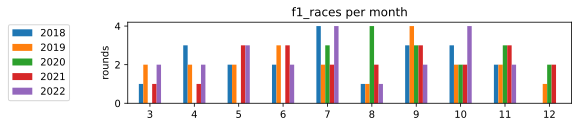

In [159]:
ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='rounds',
    figsize=(8, 1.5), title='f1_races per month'
)

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(-0.2, 0.5), ncol=1)

# Let's find out some stuff
Using the `f1_results` dataset.

In [187]:
# first, clean up the data in the f1_results dataframe
# f1_results.loc[:, ['date']] = f1_races.loc[:, ['date']].apply(pd.to_datetime)
# f1_results.loc[:, ['date_of_birth']] = f1_races.loc[:, ['date_of_birth']].apply(pd.to_datetime)
f1_results.loc[:, ['season']] = f1_races.loc[:, ['season']].astype('int64', copy=False)
f1_results.dtypes
# f1_results.loc[:, ['season']].astype({'season': 'int'}).dtypes
# f1_results.loc[:, ['date']].astype({'date': 'datetime64[ns]'}).dtypes
# f1_results.loc[:, ['date_of_birth']].astype({'date_of_birth': 'datetime64[ns]'}).dtypes
# lowercase all the columns so that they are easier to use
# f1_results.rename(columns=lambda x : x.lower(), inplace=True)
# f1_results.head()

season                  float64
round                     int64
date             datetime64[ns]
circuit_id               object
driver                   object
date_of_birth            object
nationality              object
constructor              object
grid                      int64
time                    float64
status                   object
points                  float64
podium                    int64
dtype: object

In [194]:
f1_results.head()

,season,round,date,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,1950.0,1,1950-05-13,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1
1,1950.0,1,1950-05-21,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2
2,1950.0,1,1950-05-30,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3
3,1950.0,1,1950-06-04,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4
4,1950.0,1,1950-06-18,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5


In [181]:
# what columns are in this dataset?
f1_results.columns

Index(['season', 'round', 'date', 'circuit_id', 'driver', 'date_of_birth',
       'nationality', 'constructor', 'grid', 'time', 'status', 'points',
       'podium'],
      dtype='object')

In [200]:
# how many distinct drivers are in the dataset?
len(f1_results['driver'].unique())

832

In [ ]:
# which of those drivers are Austrian?
f1_results.query('driver == `Austrian`')

In [40]:
# what are the results from the latest race?

# hint: you may use the date column; convert it to datetime first!

f1_results.loc[:, ['date']] = f1_results.loc[:, ['date']].apply(pd.to_datetime)
f1_results.dtypes
f1_latest = f1_results.loc[f1_results['date'] == f1_results['date'].max()]
f1_latest.head()

,season,Round,date,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
25187,2022,13,2022-07-31,hungaroring,max_verstappen,1997-09-30,Dutch,red_bull,10,5975912.0,Finished,25.0,1
25188,2022,13,2022-07-31,hungaroring,hamilton,1985-01-07,British,mercedes,7,5983746.0,Finished,19.0,2
25189,2022,13,2022-07-31,hungaroring,russell,1998-02-15,British,mercedes,1,5988249.0,Finished,15.0,3
25190,2022,13,2022-07-31,hungaroring,sainz,1994-09-01,Spanish,ferrari,2,5990491.0,Finished,12.0,4
25191,2022,13,2022-07-31,hungaroring,perez,1990-01-26,Mexican,red_bull,11,5991600.0,Finished,10.0,5


In [62]:
# who won the race? how many races has this pilot won this year?
last_index = f1_latest['podium'].idxmin()
last_index
# hints:
last_winner = f1_results.iloc[last_index]["driver"]
last_winner

f1_results[(f1_results['driver']==last_winner) & 
    (f1_results['season'] == f1_results['season'].max()) & 
    (f1_results['podium'] == 1)].podium.sum()
    
# get the winner by filterinf f1_results on 'date' and 'podium';
# then use iloc[i][j] to access the first (and only) row (i) of the dataframe and the 'driver' column (j)
# winner = f1_results[ ... filters ... ].iloc[i][j]


# use this ^ to filter f1_results on season, podium and driver
# and then count


8

In [143]:
# on which circuit did Lewis Hamilton have the most wins?
hamilton = f1_results[(f1_results['driver']=='hamilton') & (f1_results['podium'] == 1)].groupby('circuit_id').podium.count().reset_index()
hamilton[hamilton['podium']==hamilton['podium'].max()]
# f1_results[(f1_results['driver']=='hamilton') & (f1_results['podium'] == 1)]['circuit_id'].value_counts().idxmax()


,circuit_id,podium
7,hungaroring,8
25,silverstone,8


# Formula 1 Driver Career Analysis
Let't analyse the career of one of the most succesful F1 drivers of all time.

Pick a driver from the list in [this article](https://www.redbull.com/ca-en/best-f1-drivers-of-all-time) and analyse their career below.

Or you can pick your favourite driver instead =)

In [147]:
# look for your driver's id in the list
f1_results['driver'].unique()

array(['farina', 'fagioli', 'reg_parnell', 'cabantous', 'rosier',
       'gerard', 'harrison', 'etancelin', 'hampshire', 'fry',
       'shawe_taylor', 'claes', 'fangio', 'kelly', 'bira', 'murray',
       'crossley', 'graffenried', 'chiron', 'martin', 'peter_walker',
       'rolt', 'leslie_johnson', 'ascari', 'sommer', 'villoresi',
       'gonzalez', 'manzon', 'trintignant', 'rol', 'schell', 'whitehead',
       'pian', 'parsons', 'holland', 'rose', 'green', 'bettenhausen',
       'chitwood', 'wallard', 'faulkner', 'george_connor', 'paul_russo',
       'flaherty', 'fohr', 'darter', 'hellings', 'mcgrath', 'ruttman',
       'hartley', 'davies', 'mcdowell', 'walt_brown', 'webb', 'hoyt',
       'ader', 'holmes', 'rathmann', 'banks', 'schindler', 'levrett',
       'cantrell', 'agabashian', 'bonetto', 'pagani', 'branca', 'levegh',
       'chaboud', 'pozzi', 'serafini', 'guy_mairesse', 'taruffi',
       'biondetti', 'louveau', 'comotti', 'sanesi', 'pietsch', 'moss',
       'fischer', 'abecassis

In [416]:
# which driver have you chosen?
driver = 'raikkonen'
#tsunoda

# what nationality is this driver?
nationality = f1_results[f1_results['driver']==driver][:1]['nationality'].item()

print(f"{driver}'s nationality is {nationality}")


raikkonen's nationality is Finnish


In [417]:
# when was his first race and for which constructor?
races = f1_results[f1_results['driver']==driver]

first_race_date = races.season.min()

first_race_constructor = races[races['season']==first_race_date][:1].constructor.item()

print(f"{driver}'s first race was on {first_race_date} with {first_race_constructor}")

raikkonen's first race was on 2001 with sauber


In [418]:
# when was his first podium + with which constructor?
# keep in mind the driver may have been on the podium 0 times

try:
    podiums = races[races['podium']<=3]
    first_podium_date = podiums['date'].min()
    first_podium_constructor = podiums[podiums['date']==first_podium_date]['constructor'].item()
    print(f"{driver}'s first podium was on {first_podium_date} with {first_podium_constructor}")
except ValueError:
    print("He did not stand on the podium")


raikkonen's first podium was on 2002-03-03 00:00:00 with mclaren


In [419]:
# what about his first win + with which constructor + which circuit?
# keep in mind the driver may have won 0 races
try:    
    first_win = races[races['podium']==1]
    first_win_date = podiums['date'].min()
    first_win_constructor = podiums[podiums['date']==first_podium_date]['constructor'].item()
    first_win_circuit = podiums[podiums['date']==first_podium_date]['circuit_id'].item()
    print(f"{driver}'s first win was on {first_win_date} with {first_win_constructor} at {first_win_circuit}")
except:
    print("He did not win")

raikkonen's first win was on 2002-03-03 00:00:00 with mclaren at albert_park


In [420]:
# how many race starts?
# hint: check the Status is NOT one of Did not qualify, Did not prequalify, Not classified
race_starts = races[(races['Status']!="Did not qualify") & 
    (races['Status']!="Did not prequalify") &
    (races['Status']!="Not classified")].Status.count()

print(f"{driver} has {race_starts} race starts")

raikkonen has 352 race starts


In [421]:
# how many of those races did he actually finished?
# hint: look for Status Finished; for this exercise, we'll not consider other statuses as successful

races_finished = races[races['Status']!="Finished"].Status.count()
print(f"{driver} has finished {races_finished} races")

raikkonen has finished 131 races


In [422]:
# how many has he won?
races_won = races[races['podium']==1].podium.count()
print(f"{driver} has won {races_won} races")

raikkonen has won 21 races


In [423]:
import numpy as np

In [424]:
# create a dataframe that contains the follwing information:
#
# driver
# nationality
# season
# circuit_id
# race_started (Boolean)
# race_finished (Boolean)
# race_won (Boolean)
# constructor
import copy

f1_career = copy.deepcopy(races)
f1_career.drop(['GriD', 'tIME','points','date','DATE_of_birth'], axis=1, inplace=True)


In [425]:
f1_career

,season,Round,circuit_id,driver,nationality,constructor,Status,podium
16605,2001,1,albert_park,raikkonen,Finnish,sauber,Finished,6
16643,2001,2,sepang,raikkonen,Finnish,sauber,Driveshaft,22
16655,2001,3,interlagos,raikkonen,Finnish,sauber,Spun off,12
16685,2001,4,imola,raikkonen,Finnish,sauber,Steering,20
16695,2001,5,catalunya,raikkonen,Finnish,sauber,Finished,8
...,...,...,...,...,...,...,...,...
24854,2021,18,rodriguez,raikkonen,Finnish,alfa,+1 Lap,8
24878,2021,19,interlagos,raikkonen,Finnish,alfa,+1 Lap,12
24900,2021,20,losail,raikkonen,Finnish,alfa,+1 Lap,14
24921,2021,21,jeddah,raikkonen,Finnish,alfa,+1 Lap,15


In [426]:
f1_career

,season,Round,circuit_id,driver,nationality,constructor,Status,podium
16605,2001,1,albert_park,raikkonen,Finnish,sauber,Finished,6
16643,2001,2,sepang,raikkonen,Finnish,sauber,Driveshaft,22
16655,2001,3,interlagos,raikkonen,Finnish,sauber,Spun off,12
16685,2001,4,imola,raikkonen,Finnish,sauber,Steering,20
16695,2001,5,catalunya,raikkonen,Finnish,sauber,Finished,8
...,...,...,...,...,...,...,...,...
24854,2021,18,rodriguez,raikkonen,Finnish,alfa,+1 Lap,8
24878,2021,19,interlagos,raikkonen,Finnish,alfa,+1 Lap,12
24900,2021,20,losail,raikkonen,Finnish,alfa,+1 Lap,14
24921,2021,21,jeddah,raikkonen,Finnish,alfa,+1 Lap,15


In [427]:
f1_career=f1_career.reindex(columns=['driver','nationality','season','circuit_id','constructor','Status','podium'])
f1_career

f1_career['race_finished'] = np.where(f1_career['Status']=="Finished", True, False)

f1_career['race_started'] = np.where((f1_career['Status']!="Did not qualify") & 
    (races['Status']!="Did not prequalify") &
    (races['Status']!="Not classified"), True, False)

f1_career['race_won'] = np.where(f1_career['podium']==1, True, False)

f1_career

,driver,nationality,season,circuit_id,constructor,Status,podium,race_finished,race_started,race_won
16605,raikkonen,Finnish,2001,albert_park,sauber,Finished,6,True,True,False
16643,raikkonen,Finnish,2001,sepang,sauber,Driveshaft,22,False,True,False
16655,raikkonen,Finnish,2001,interlagos,sauber,Spun off,12,False,True,False
16685,raikkonen,Finnish,2001,imola,sauber,Steering,20,False,True,False
16695,raikkonen,Finnish,2001,catalunya,sauber,Finished,8,True,True,False
...,...,...,...,...,...,...,...,...,...,...
24854,raikkonen,Finnish,2021,rodriguez,alfa,+1 Lap,8,False,True,False
24878,raikkonen,Finnish,2021,interlagos,alfa,+1 Lap,12,False,True,False
24900,raikkonen,Finnish,2021,losail,alfa,+1 Lap,14,False,True,False
24921,raikkonen,Finnish,2021,jeddah,alfa,+1 Lap,15,False,True,False


In [428]:
f1_career.drop(columns=['Status', 'podium'], axis=1, inplace=True)
f1_career

,driver,nationality,season,circuit_id,constructor,race_finished,race_started,race_won
16605,raikkonen,Finnish,2001,albert_park,sauber,True,True,False
16643,raikkonen,Finnish,2001,sepang,sauber,False,True,False
16655,raikkonen,Finnish,2001,interlagos,sauber,False,True,False
16685,raikkonen,Finnish,2001,imola,sauber,False,True,False
16695,raikkonen,Finnish,2001,catalunya,sauber,True,True,False
...,...,...,...,...,...,...,...,...
24854,raikkonen,Finnish,2021,rodriguez,alfa,False,True,False
24878,raikkonen,Finnish,2021,interlagos,alfa,False,True,False
24900,raikkonen,Finnish,2021,losail,alfa,False,True,False
24921,raikkonen,Finnish,2021,jeddah,alfa,False,True,False


## Plotting the results

In [429]:
# plot the race results per season

# prep the data
f1_career['race_started'] = f1_career['race_started'].astype(int)
f1_career['race_finished'] = f1_career['race_finished'].astype(int)
f1_career['race_won'] = f1_career['race_won'].astype(int)

plot_data_wins = f1_career.pivot_table(index="season", columns="driver", values="race_won", aggfunc="sum")
plot_data_start = f1_career.pivot_table(index="season", columns="driver", values="race_started", aggfunc="sum")


<AxesSubplot:title={'center':"raikkonen's F1 Wins"}, xlabel='season', ylabel='races'>

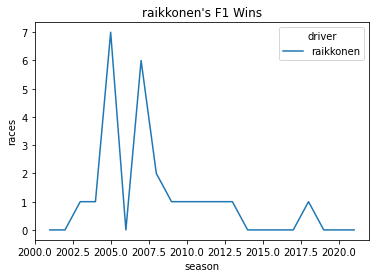

In [430]:
plot_data_wins.plot(title=f"{driver}'s F1 Wins", ylabel="races")

<AxesSubplot:title={'center':"raikkonen's F1 Race Starts"}, xlabel='season', ylabel='races'>

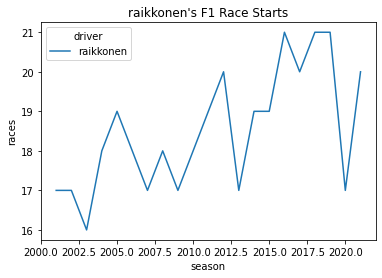

In [431]:
plot_data_start.plot(title=f"{driver}'s F1 Race Starts", ylabel="races")

### Combine the plots

In [432]:
from functools import reduce

plot_data = reduce(lambda  left,right: pd.merge(left,right,on=["season"], how='inner'), [plot_data_start, plot_data_wins])
plot_data.rename(
    columns={
        f"{driver}_x": "starts",
        f"{driver}_y": "wins"
    }, inplace=True)
plot_data.head()

driver,starts,wins
season,,
2001,17,0
2002,17,0
2003,16,1
2004,18,1
2005,19,7


<AxesSubplot:title={'center':"raikkonen's F1 Career"}, xlabel='season', ylabel='races'>

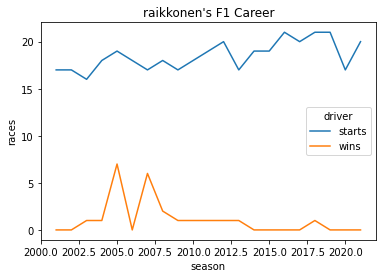

In [433]:
plot_data.plot(title=f"{driver}'s F1 Career", ylabel="races")

### Export the results

In [406]:
# explore more possibilities to store the results, e.g. to_sql()
f1_career.to_csv(f"./results/f1_career_{driver}.csv", index=False)

# Further reading
* [Loading a Dataframe from a SQL database](https://pythonspeed.com/articles/pandas-sql-chunking/)
* [Connecting to Redshift from Python](https://docs.aws.amazon.com/redshift/latest/mgmt/python-connect-examples.html)
* [Pandas I/O](https://pandas.pydata.org/docs/reference/io.html)